In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
import math
from sklearn.metrics import r2_score


In [2]:
dataset = pd.read_csv('/content/friction_01.csv')

In [3]:
dataset.head()

Gradation         d        Sf   DEPTH    width             n  SPEC.  \
0       1.31  0.000170  0.000100  2.1153  146.603  7.390000e-07   2.65   
1       1.50  0.000195  0.000045  1.4630  124.968  9.660000e-07   2.65   
2       1.59  0.000128  0.000142  0.9144   86.258  8.900000e-07   2.65   
3       1.44  0.000241  0.000086  1.8593  125.578  9.330000e-07   2.65   
4       1.00  0.000020  0.000088  2.3805   16.026  5.940000e-07   2.65   

       uavg     g    lambda  
0  0.391274  9.81  0.108397  
1  0.376983  9.81  0.036424  
2  0.348601  9.81  0.083707  
3  0.471650  9.81  0.056523  
4  0.509830  9.81  0.063012

In [4]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 46.9 MB/s 


In [5]:
X0=dataset[['Gradation']]
y0=dataset.iloc[:,-1]
X1=dataset[['Gradation','d']]
y1=dataset.iloc[:,-1]
X2=dataset[['Gradation','d','Sf']]
y2=dataset.iloc[:,-1]
X3=dataset[['Gradation','d','Sf','DEPTH']]
y3=dataset.iloc[:,-1]
X4=dataset[['Gradation','d','Sf','DEPTH','width']]
y4=dataset.iloc[:,-1]
X5=dataset[['Gradation','d','Sf','DEPTH','width','n']]
y5=dataset.iloc[:,-1]
X6=dataset[['Gradation','d','Sf','DEPTH','width','n','SPEC.']]
y6=dataset.iloc[:,-1]
X7=dataset[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']]
y7=dataset.iloc[:,-1]
X8=dataset[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']]
y8=dataset.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.2, random_state = 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.2, random_state = 1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.2, random_state = 1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size = 0.2, random_state = 1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size = 0.2, random_state = 1)


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X0_train[['Gradation']] = sc.fit_transform(X0_train[['Gradation']])
X0_test[['Gradation']] = sc.transform(X0_test[['Gradation']])
X1_train[['Gradation','d']] = sc.fit_transform(X1_train[['Gradation','d']])
X1_test[['Gradation','d']] = sc.transform(X1_test[['Gradation','d']])
X2_train[['Gradation','d','Sf']] = sc.fit_transform(X2_train[['Gradation','d','Sf']])
X2_test[['Gradation','d','Sf']] = sc.transform(X2_test[['Gradation','d','Sf']])
X3_train[['Gradation','d','Sf','DEPTH']] = sc.fit_transform(X3_train[['Gradation','d','Sf','DEPTH']])
X3_test[['Gradation','d','Sf','DEPTH']] = sc.transform(X3_test[['Gradation','d','Sf','DEPTH']])
X4_train[['Gradation','d','Sf','DEPTH','width']] = sc.fit_transform(X4_train[['Gradation','d','Sf','DEPTH','width']])
X4_test[['Gradation','d','Sf','DEPTH','width']] = sc.transform(X4_test[['Gradation','d','Sf','DEPTH','width']])
X5_train[['Gradation','d','Sf','DEPTH','width','n']] = sc.fit_transform(X5_train[['Gradation','d','Sf','DEPTH','width','n']])
X5_test[['Gradation','d','Sf','DEPTH','width','n']] = sc.transform(X5_test[['Gradation','d','Sf','DEPTH','width','n']])
X6_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.']] = sc.fit_transform(X6_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.']])
X6_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.']] = sc.transform(X6_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.']])
X7_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']] = sc.fit_transform(X7_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']])
X7_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']] = sc.transform(X7_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']])
X8_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']] = sc.fit_transform(X8_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']])
X8_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']] = sc.transform(X8_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']])

In [8]:
from catboost import CatBoostRegressor
#build model
reg_catm_0= CatBoostRegressor(loss_function='RMSE')
reg_catm_1= CatBoostRegressor(loss_function='RMSE')
reg_catm_2= CatBoostRegressor(loss_function='RMSE')
reg_catm_3= CatBoostRegressor(loss_function='RMSE')
reg_catm_4= CatBoostRegressor(loss_function='RMSE')
reg_catm_5= CatBoostRegressor(loss_function='RMSE')
reg_catm_6= CatBoostRegressor(loss_function='RMSE')
reg_catm_7= CatBoostRegressor(loss_function='RMSE')
reg_catm_8= CatBoostRegressor(loss_function='RMSE')
# Fit model 
reg_catm_0.fit( X0_train, y0_train,eval_set=(X0_test, y0_test),plot=True)
reg_catm_1.fit( X1_train, y1_train,eval_set=(X1_test, y1_test),plot=True)
reg_catm_2.fit( X2_train, y0_train,eval_set=(X2_test, y2_test),plot=True)
reg_catm_3.fit( X3_train, y0_train,eval_set=(X3_test, y3_test),plot=True)
reg_catm_4.fit( X4_train, y0_train,eval_set=(X4_test, y4_test),plot=True)
reg_catm_5.fit( X5_train, y0_train,eval_set=(X5_test, y5_test),plot=True)
reg_catm_6.fit( X6_train, y0_train,eval_set=(X6_test, y6_test),plot=True)
reg_catm_7.fit( X7_train, y0_train,eval_set=(X7_test, y7_test),plot=True)
reg_catm_8.fit( X8_train, y0_train,eval_set=(X8_test, y8_test),plot=True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.047705
0:	learn: 0.0543507	test: 0.0526594	best: 0.0526594 (0)	total: 46.5ms	remaining: 46.5s
1:	learn: 0.0528860	test: 0.0516727	best: 0.0516727 (1)	total: 46.8ms	remaining: 23.4s
2:	learn: 0.0515873	test: 0.0508609	best: 0.0508609 (2)	total: 47.3ms	remaining: 15.7s
3:	learn: 0.0502695	test: 0.0499656	best: 0.0499656 (3)	total: 47.7ms	remaining: 11.9s
4:	learn: 0.0489659	test: 0.0490466	best: 0.0490466 (4)	total: 48.1ms	remaining: 9.57s
5:	learn: 0.0477800	test: 0.0482675	best: 0.0482675 (5)	total: 48.5ms	remaining: 8.04s
6:	learn: 0.0467275	test: 0.0477507	best: 0.0477507 (6)	total: 53.1ms	remaining: 7.53s
7:	learn: 0.0456190	test: 0.0467709	best: 0.0467709 (7)	total: 58.1ms	remaining: 7.21s
8:	learn: 0.0446776	test: 0.0460790	best: 0.0460790 (8)	total: 59.3ms	remaining: 6.53s
9:	learn: 0.0437479	test: 0.0456189	best: 0.0456189 (9)	total: 60.4ms	remaining: 5.98s
10:	learn: 0.0427724	test: 0.0449545	best: 0.0449545 (10)	total: 65.4ms	remaining: 5.88s
11:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.047705
0:	learn: 0.0541916	test: 0.0521113	best: 0.0521113 (0)	total: 970us	remaining: 970ms
1:	learn: 0.0525007	test: 0.0505432	best: 0.0505432 (1)	total: 5.95ms	remaining: 2.97s
2:	learn: 0.0509158	test: 0.0490982	best: 0.0490982 (2)	total: 9.35ms	remaining: 3.11s
3:	learn: 0.0496369	test: 0.0484753	best: 0.0484753 (3)	total: 11.3ms	remaining: 2.8s
4:	learn: 0.0481715	test: 0.0471453	best: 0.0471453 (4)	total: 13.2ms	remaining: 2.63s
5:	learn: 0.0469180	test: 0.0462887	best: 0.0462887 (5)	total: 13.9ms	remaining: 2.3s
6:	learn: 0.0456634	test: 0.0453178	best: 0.0453178 (6)	total: 14.6ms	remaining: 2.08s
7:	learn: 0.0444646	test: 0.0445291	best: 0.0445291 (7)	total: 15.3ms	remaining: 1.89s
8:	learn: 0.0433789	test: 0.0438378	best: 0.0438378 (8)	total: 15.8ms	remaining: 1.75s
9:	learn: 0.0423355	test: 0.0431817	best: 0.0431817 (9)	total: 16.5ms	remaining: 1.63s
10:	learn: 0.0412105	test: 0.0422419	best: 0.0422419 (10)	total: 21.2ms	remaining: 1.91s
11:	learn: 0.0

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.047705
0:	learn: 0.0541757	test: 0.0521516	best: 0.0521516 (0)	total: 3.78ms	remaining: 3.78s
1:	learn: 0.0525065	test: 0.0506601	best: 0.0506601 (1)	total: 4.72ms	remaining: 2.36s
2:	learn: 0.0509469	test: 0.0493059	best: 0.0493059 (2)	total: 5.67ms	remaining: 1.88s
3:	learn: 0.0495703	test: 0.0483650	best: 0.0483650 (3)	total: 6.62ms	remaining: 1.65s
4:	learn: 0.0481359	test: 0.0470694	best: 0.0470694 (4)	total: 7.56ms	remaining: 1.5s
5:	learn: 0.0468063	test: 0.0461547	best: 0.0461547 (5)	total: 8.45ms	remaining: 1.4s
6:	learn: 0.0456120	test: 0.0453832	best: 0.0453832 (6)	total: 9.51ms	remaining: 1.35s
7:	learn: 0.0444297	test: 0.0445664	best: 0.0445664 (7)	total: 10.6ms	remaining: 1.31s
8:	learn: 0.0433454	test: 0.0438425	best: 0.0438425 (8)	total: 11.5ms	remaining: 1.27s
9:	learn: 0.0422983	test: 0.0431206	best: 0.0431206 (9)	total: 12.7ms	remaining: 1.25s
10:	learn: 0.0413609	test: 0.0425137	best: 0.0425137 (10)	total: 13.7ms	remaining: 1.23s
11:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.047705
0:	learn: 0.0543012	test: 0.0522474	best: 0.0522474 (0)	total: 1.41ms	remaining: 1.41s
1:	learn: 0.0528803	test: 0.0509524	best: 0.0509524 (1)	total: 2.58ms	remaining: 1.29s
2:	learn: 0.0512969	test: 0.0495405	best: 0.0495405 (2)	total: 3.9ms	remaining: 1.29s
3:	learn: 0.0498310	test: 0.0484676	best: 0.0484676 (3)	total: 5.04ms	remaining: 1.26s
4:	learn: 0.0482901	test: 0.0470903	best: 0.0470903 (4)	total: 6.24ms	remaining: 1.24s
5:	learn: 0.0468666	test: 0.0458214	best: 0.0458214 (5)	total: 7.41ms	remaining: 1.23s
6:	learn: 0.0454940	test: 0.0446031	best: 0.0446031 (6)	total: 8.51ms	remaining: 1.21s
7:	learn: 0.0443934	test: 0.0435504	best: 0.0435504 (7)	total: 9.59ms	remaining: 1.19s
8:	learn: 0.0432364	test: 0.0426821	best: 0.0426821 (8)	total: 10.7ms	remaining: 1.18s
9:	learn: 0.0421974	test: 0.0416518	best: 0.0416518 (9)	total: 12.3ms	remaining: 1.22s
10:	learn: 0.0411336	test: 0.0409612	best: 0.0409612 (10)	total: 13.8ms	remaining: 1.24s
11:	learn: 0

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.047705
0:	learn: 0.0543001	test: 0.0525559	best: 0.0525559 (0)	total: 1.99ms	remaining: 1.99s
1:	learn: 0.0527652	test: 0.0514948	best: 0.0514948 (1)	total: 3.95ms	remaining: 1.97s
2:	learn: 0.0511294	test: 0.0504163	best: 0.0504163 (2)	total: 6.68ms	remaining: 2.22s
3:	learn: 0.0495484	test: 0.0489926	best: 0.0489926 (3)	total: 8.84ms	remaining: 2.2s
4:	learn: 0.0482797	test: 0.0478689	best: 0.0478689 (4)	total: 10.4ms	remaining: 2.06s
5:	learn: 0.0468575	test: 0.0466341	best: 0.0466341 (5)	total: 12.2ms	remaining: 2.03s
6:	learn: 0.0455107	test: 0.0454690	best: 0.0454690 (6)	total: 22.7ms	remaining: 3.22s
7:	learn: 0.0442710	test: 0.0445604	best: 0.0445604 (7)	total: 28.2ms	remaining: 3.49s
8:	learn: 0.0431945	test: 0.0437346	best: 0.0437346 (8)	total: 30.1ms	remaining: 3.31s
9:	learn: 0.0419802	test: 0.0426657	best: 0.0426657 (9)	total: 36.1ms	remaining: 3.58s
10:	learn: 0.0409250	test: 0.0415318	best: 0.0415318 (10)	total: 38ms	remaining: 3.41s
11:	learn: 0.0

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.047705
0:	learn: 0.0542326	test: 0.0524491	best: 0.0524491 (0)	total: 7.88ms	remaining: 7.88s
1:	learn: 0.0527061	test: 0.0513527	best: 0.0513527 (1)	total: 12.3ms	remaining: 6.11s
2:	learn: 0.0512150	test: 0.0505154	best: 0.0505154 (2)	total: 15.6ms	remaining: 5.17s
3:	learn: 0.0498126	test: 0.0495749	best: 0.0495749 (3)	total: 17.8ms	remaining: 4.43s
4:	learn: 0.0486788	test: 0.0488480	best: 0.0488480 (4)	total: 21.8ms	remaining: 4.33s
5:	learn: 0.0472719	test: 0.0475555	best: 0.0475555 (5)	total: 26.2ms	remaining: 4.34s
6:	learn: 0.0458693	test: 0.0462951	best: 0.0462951 (6)	total: 28.3ms	remaining: 4.02s
7:	learn: 0.0447387	test: 0.0455696	best: 0.0455696 (7)	total: 34.2ms	remaining: 4.24s
8:	learn: 0.0436348	test: 0.0448808	best: 0.0448808 (8)	total: 36.6ms	remaining: 4.03s
9:	learn: 0.0426946	test: 0.0438961	best: 0.0438961 (9)	total: 39.5ms	remaining: 3.91s
10:	learn: 0.0415575	test: 0.0429449	best: 0.0429449 (10)	total: 42.6ms	remaining: 3.83s
11:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.047705
0:	learn: 0.0542125	test: 0.0523612	best: 0.0523612 (0)	total: 1.73ms	remaining: 1.73s
1:	learn: 0.0527324	test: 0.0514854	best: 0.0514854 (1)	total: 4.38ms	remaining: 2.19s
2:	learn: 0.0512123	test: 0.0502496	best: 0.0502496 (2)	total: 6.97ms	remaining: 2.31s
3:	learn: 0.0500375	test: 0.0492146	best: 0.0492146 (3)	total: 8.45ms	remaining: 2.1s
4:	learn: 0.0489169	test: 0.0484299	best: 0.0484299 (4)	total: 9.75ms	remaining: 1.94s
5:	learn: 0.0476987	test: 0.0474750	best: 0.0474750 (5)	total: 11.5ms	remaining: 1.9s
6:	learn: 0.0464599	test: 0.0462101	best: 0.0462101 (6)	total: 13.6ms	remaining: 1.94s
7:	learn: 0.0451097	test: 0.0450145	best: 0.0450145 (7)	total: 16.3ms	remaining: 2.03s
8:	learn: 0.0438941	test: 0.0441766	best: 0.0441766 (8)	total: 20.3ms	remaining: 2.23s
9:	learn: 0.0428031	test: 0.0431343	best: 0.0431343 (9)	total: 25.3ms	remaining: 2.51s
10:	learn: 0.0417352	test: 0.0421543	best: 0.0421543 (10)	total: 26.6ms	remaining: 2.39s
11:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.047705
0:	learn: 0.0541657	test: 0.0525956	best: 0.0525956 (0)	total: 2.22ms	remaining: 2.21s
1:	learn: 0.0528308	test: 0.0514083	best: 0.0514083 (1)	total: 4.82ms	remaining: 2.4s
2:	learn: 0.0514074	test: 0.0501245	best: 0.0501245 (2)	total: 12.6ms	remaining: 4.2s
3:	learn: 0.0499544	test: 0.0490872	best: 0.0490872 (3)	total: 14.4ms	remaining: 3.57s
4:	learn: 0.0487640	test: 0.0485567	best: 0.0485567 (4)	total: 16.1ms	remaining: 3.2s
5:	learn: 0.0474827	test: 0.0476969	best: 0.0476969 (5)	total: 22.2ms	remaining: 3.67s
6:	learn: 0.0463731	test: 0.0466187	best: 0.0466187 (6)	total: 24.9ms	remaining: 3.53s
7:	learn: 0.0454211	test: 0.0458781	best: 0.0458781 (7)	total: 26.6ms	remaining: 3.3s
8:	learn: 0.0441434	test: 0.0447684	best: 0.0447684 (8)	total: 28.3ms	remaining: 3.12s
9:	learn: 0.0430189	test: 0.0440087	best: 0.0440087 (9)	total: 56.5ms	remaining: 5.59s
10:	learn: 0.0417784	test: 0.0428536	best: 0.0428536 (10)	total: 73.7ms	remaining: 6.62s
11:	learn: 0.04

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.047705
0:	learn: 0.0541657	test: 0.0525956	best: 0.0525956 (0)	total: 5.36ms	remaining: 5.35s
1:	learn: 0.0528308	test: 0.0514083	best: 0.0514083 (1)	total: 19.1ms	remaining: 9.54s
2:	learn: 0.0514074	test: 0.0501245	best: 0.0501245 (2)	total: 28.2ms	remaining: 9.38s
3:	learn: 0.0499544	test: 0.0490872	best: 0.0490872 (3)	total: 42.7ms	remaining: 10.6s
4:	learn: 0.0487640	test: 0.0485567	best: 0.0485567 (4)	total: 49.2ms	remaining: 9.79s
5:	learn: 0.0474827	test: 0.0476969	best: 0.0476969 (5)	total: 63.5ms	remaining: 10.5s
6:	learn: 0.0463731	test: 0.0466187	best: 0.0466187 (6)	total: 68.2ms	remaining: 9.68s
7:	learn: 0.0454211	test: 0.0458781	best: 0.0458781 (7)	total: 83.2ms	remaining: 10.3s
8:	learn: 0.0441434	test: 0.0447684	best: 0.0447684 (8)	total: 88.4ms	remaining: 9.73s
9:	learn: 0.0430189	test: 0.0440087	best: 0.0440087 (9)	total: 94.1ms	remaining: 9.31s
10:	learn: 0.0417784	test: 0.0428536	best: 0.0428536 (10)	total: 103ms	remaining: 9.3s
11:	learn: 0.

In [9]:
y0_pred_catm = reg_catm_0.predict(X0_test)
y1_pred_catm = reg_catm_1.predict(X1_test)
y2_pred_catm = reg_catm_2.predict(X2_test)
y3_pred_catm = reg_catm_3.predict(X3_test)
y4_pred_catm = reg_catm_4.predict(X4_test)
y5_pred_catm = reg_catm_5.predict(X5_test)
y6_pred_catm = reg_catm_6.predict(X6_test)
y7_pred_catm = reg_catm_7.predict(X7_test)
y8_pred_catm = reg_catm_8.predict(X8_test)

In [10]:
print(type(y0_test.to_numpy()))

<class 'numpy.ndarray'>


In [11]:
predicted_cat_boost = np.concatenate((y0_test.to_numpy().reshape(len(y0_test),1), y0_pred_catm.reshape(len(y0_pred_catm),1), y1_pred_catm.reshape(len(y1_pred_catm),1), y2_pred_catm.reshape(len(y2_pred_catm),1), y3_pred_catm.reshape(len(y3_pred_catm),1), y4_pred_catm.reshape(len(y4_pred_catm),1), y5_pred_catm.reshape(len(y5_pred_catm),1), y6_pred_catm.reshape(len(y6_pred_catm),1), y7_pred_catm.reshape(len(y7_pred_catm),1), y8_pred_catm.reshape(len(y8_pred_catm),1)),1)

In [12]:
print(predicted_cat_boost)

[[0.04698016 0.04486497 0.04197354 ... 0.04762554 0.04679737 0.04679737]
 [0.13672816 0.07123145 0.07825688 ... 0.11861382 0.13157742 0.13157742]
 [0.0388312  0.05888475 0.05493005 ... 0.0510114  0.04787889 0.04787889]
 ...
 [0.04870679 0.04337446 0.04199518 ... 0.0470037  0.04749437 0.04749437]
 [0.10107212 0.07123145 0.08211684 ... 0.09247468 0.09061391 0.09061391]
 [0.02656417 0.07123145 0.03800556 ... 0.03330484 0.02530809 0.02530809]]


In [13]:
r2_score(y0_test, y0_pred_catm)

0.6551489106495191

In [14]:
r2_score(y1_test, y1_pred_catm)

0.8480540447467243

In [15]:
r2_score(y2_test, y2_pred_catm)

0.905670890335044

In [16]:
r2_score(y3_test, y3_pred_catm)

0.9218781739497915

In [17]:
r2_score(y4_test, y4_pred_catm)

0.9179991571465616

In [18]:
r2_score(y5_test, y5_pred_catm)

0.9251541596351704

In [19]:
r2_score(y6_test, y6_pred_catm)

0.9152786106249234

In [20]:
r2_score(y7_test, y7_pred_catm)

0.9622641034728383

In [21]:
r2_score(y8_test, y8_pred_catm)

0.9622641034728383

In [22]:
pd.DataFrame(predicted_cat_boost).to_csv("catboost_result.csv")

In [23]:
print('MAE:', metrics.mean_absolute_error(y8_test, y8_pred_catm))
print('MSE:', metrics.mean_squared_error(y8_test, y8_pred_catm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y8_test, y8_pred_catm)))
print('nse:', (1-(np.sum(((y8_pred_catm)-(y8_test))**2)/np.sum(((y8_test)-(np.mean(y8_test)))**2))))

MAE: 0.005568779356459597
MSE: 0.00010895110976688512
RMSE: 0.010437964828781765
nse: 0.9622641034728383


In [24]:
X1=np.arange(0,len(y8_test))

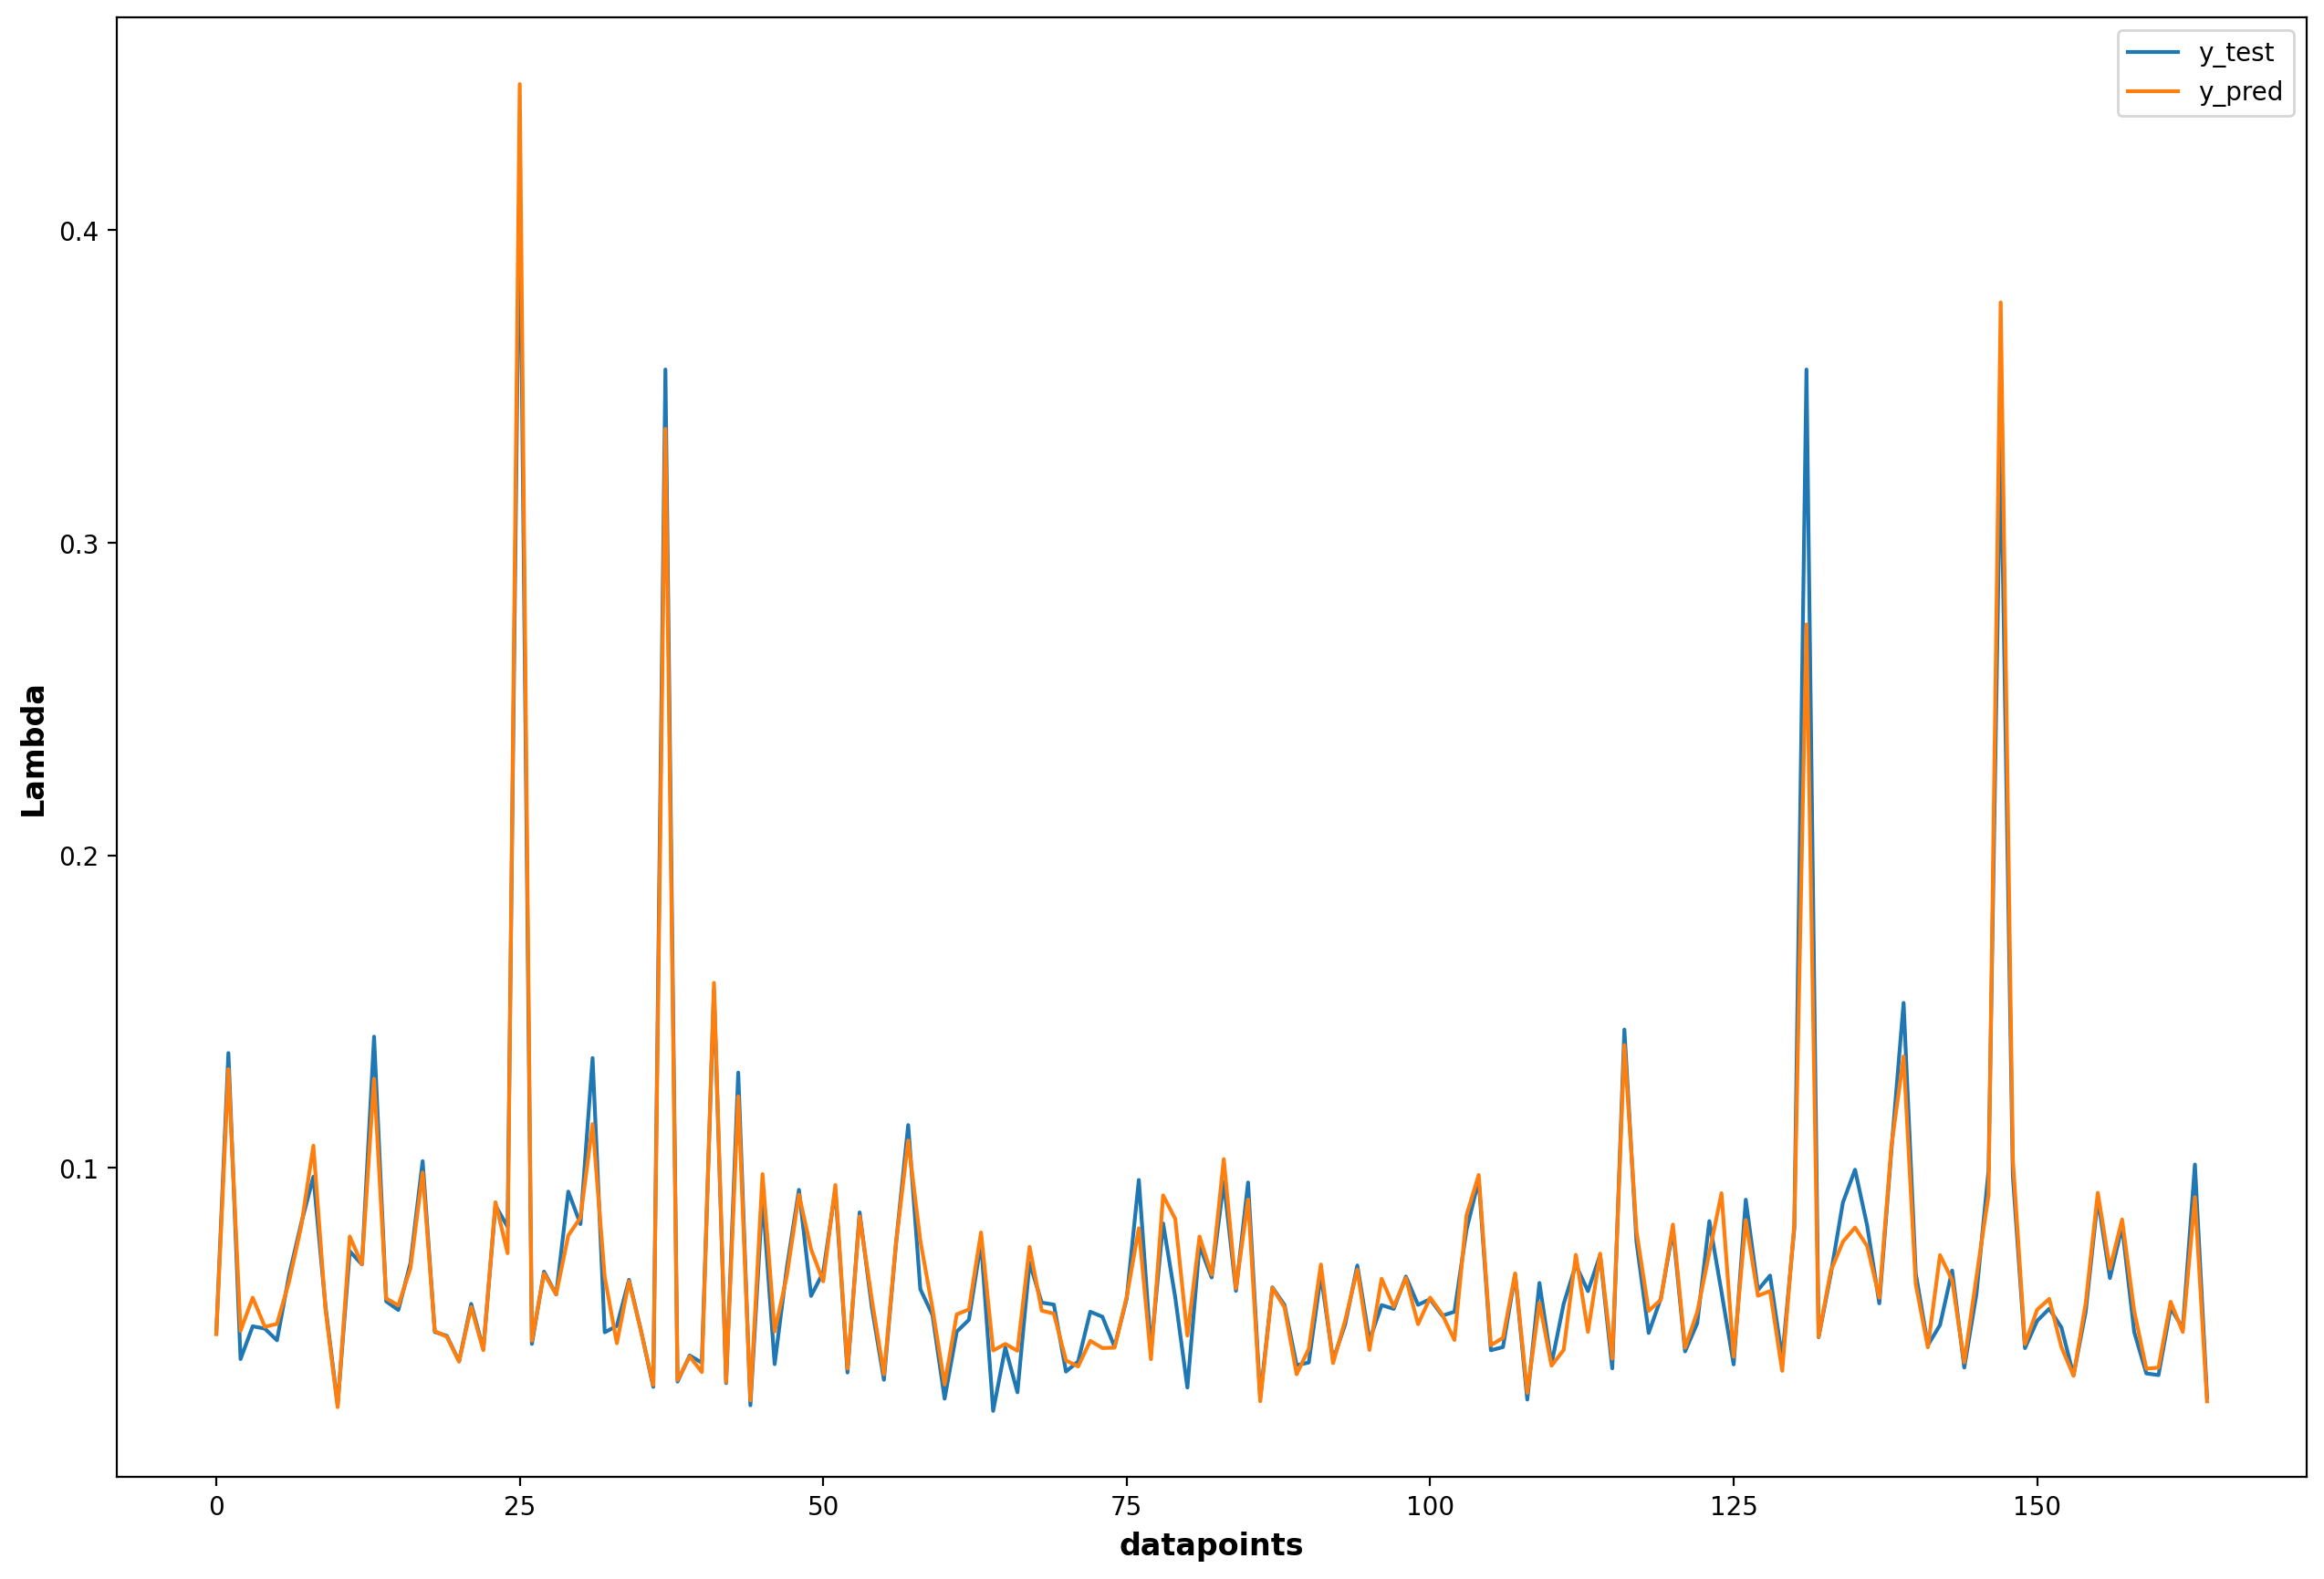

In [25]:
fig = plt.figure(figsize=(12,8), dpi=200)
axes = fig.add_axes([0,0,1,1])
axes.plot(X1, y8_test, label='y_test')
axes.plot(X1, y8_pred_catm, label='y_pred')
plt.ylabel('Lambda',fontweight='bold', fontsize='12')
plt.xlabel('datapoints',fontweight='bold', fontsize='12')
plt.legend()
plt.show()